## Sales Forecasting using Facebook Prophet (Time Series Analysis)

Business Case
- In order for the company's to become competitive and gain profit and growth, they need to leverage AI/ML for developing predictive models to forecast sales in the future.
- Predictive Models attempt at forecasting future sales based on historical data while taking into account seasonality effects, demand, holidays, promotions, and competitions.
- The Objective of this case is to predict future sales.

Problem Statement
- The Sales Department provided the sales data from 1115 stores in Europe.
- The model build during this project will help the sales department to predict future sales.
- The target is the Sales.


# Data Information

Input data :
- Id : Transaction Id (Combination of Store and data).
- Store : Unique Store id.
- Customers : Number of customers on a given day.
- Open : Boolean Value to indicate if store is open(1) or not (0).
- Promo : Describes if a store is running a promo on that day or not.
- StateHoliday : Indicates which type of state holiday is it : (a = public holiday, b = EasterHoliday, c = Chrishtmas, 0 = none).
- SchoolHoliday : Indicates if the store,date (Transaction) was affected by a school holiday.
- StoreType : Categorical data to indicate type of store(a, b, c, d).
- Assortment : a = basic, b = extra, c = extended.
- CompetitionDistance(meters) : Distance to Competitor store.
- CompetitorOpenSincemonth [Month/Year] : Date when competion was open.
- Promo2 : Continuing and consecutive promotion for some store (0 : Store is not participating, 1 : Store is participating).
- Promo2Since [Year/Month] : Date when store started participating in Promo2.
- PromoInterval : Describes the consecutive intervals Promo2 is started, naming the months promotion is started from(Duration Promo2 has been running for).

Output Data :
- Sales (in Euros) : sales / day

## Task 1 : Importing Libraries

In [1]:
## Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Task 2 : Importing Data

The data is provided in 2 files :
- train.csv : Contains sales information (Transaction data for stores) (Around 1 million records)
- store.csv : Contains store information (Around 1 thousand records)

In [2]:
## Importing Sales (Training) data

sales_data_df = pd.read_csv('train.csv')
sales_data_df.head()

C:\Users\Palak\AppData\Local\Temp\ipykernel_13792\2805191882.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data_df = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
sales_data_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [4]:
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
## Average sales per day = 5773, minimum sales per day = 0, maximum sales per day = 41551
## Number of customers visiting per day : Average = 633, Minimum = 0, Maximum = 7388

sales_data_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
## Importing Store Information data

store_data_df = pd.read_csv('store.csv')
store_data_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
store_data_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [9]:
store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
## Competition Distance : Average = 5 km, Minimum = 20 meters, Maximum = 75km

store_data_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Task 3 : Data Exploration & Cleaning for Sales Data

<Axes: >

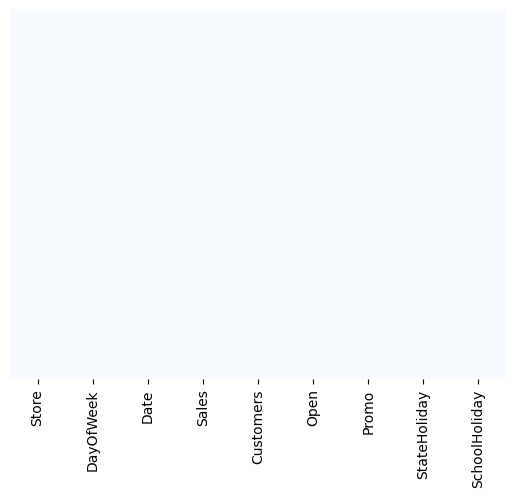

In [11]:
## Checking for missing values

sns.heatmap(sales_data_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

 No missing values for sales data

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

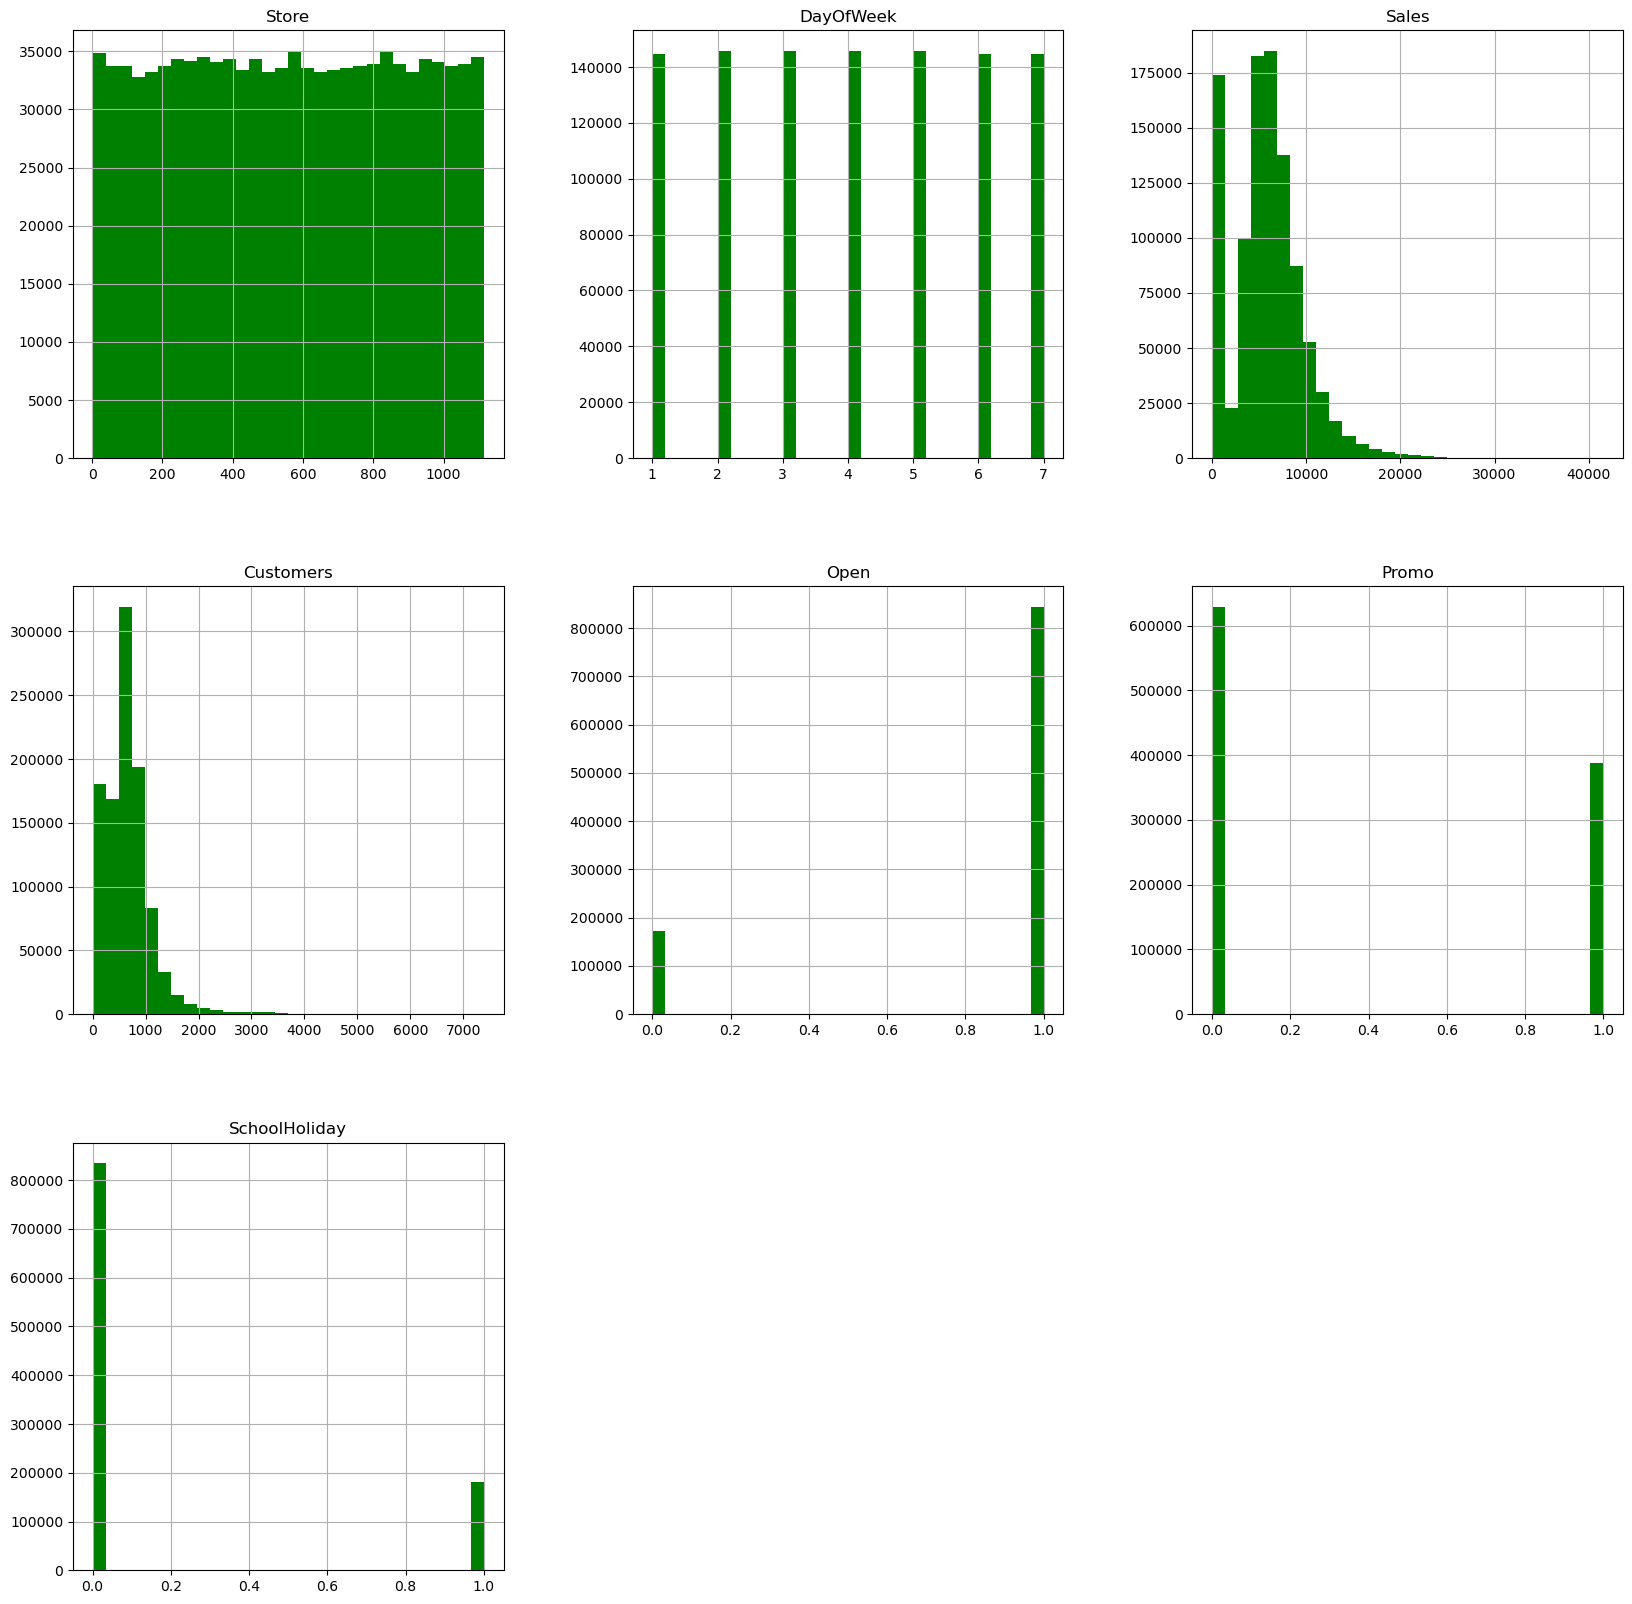

In [12]:
## Plotting Histograms for sales data

sales_data_df.hist(bins=30, figsize=(20, 20), color = 'g')

Observations :

- Data is equally distributed among all stores (no bias)
- Data is equally distributed for all days of week.
- Average sales were around 5000-6000 Euros.
- Average Customers is around 600 and MAximum customers is around 4000.
- Stores are open 80% of the time.
- Promo 1 was running 40% of the time.
- There were school holidays 18% of the time.


In [13]:
## What is the actual number of Customer: as couldn't see clearly in the graph

sales_data_df['Customers'].max()

7388

In [14]:
## Number of stores Closed : 172817

closed_stores_df = sales_data_df[sales_data_df['Open'] == 0]
closed_stores_df.shape

(172817, 9)

In [15]:
## Number of stored Closed : 844392

open_stores_df = sales_data_df[sales_data_df['Open'] == 1]
open_stores_df.shape

(844392, 9)

In [16]:
## Removing the data for stores that are closed and just keeping the data for open stores.

sales_data_df = sales_data_df[sales_data_df['Open'] == 1]

In [17]:
sales_data_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [18]:
sales_data_df.shape ## Now data consists of 844392 records

(844392, 9)

In [19]:
## Dropping the open column as it has no meaning now

sales_data_df.drop(['Open'], axis=1, inplace=True)

In [20]:
sales_data_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [21]:
sales_data_df.shape

(844392, 8)

In [22]:
sales_data_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


The average vales of Sales and Customers is now different as we got rid of the Closed stores : the values increased!

## Task 4 : Data Exploration & Cleaning for Stores Data

<Axes: >

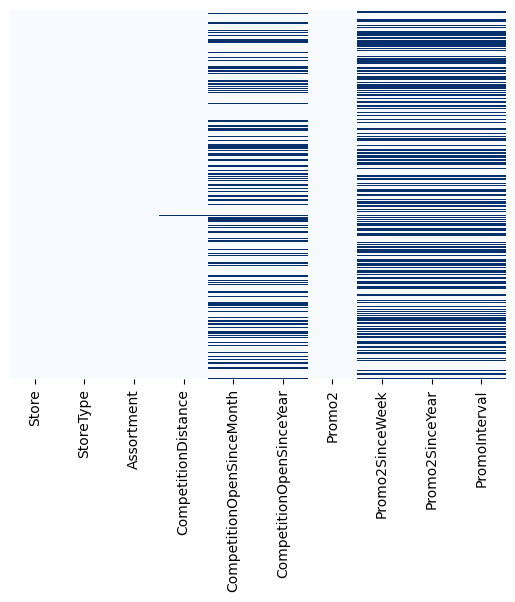

In [23]:
## Checking for missing values

sns.heatmap(store_data_df.isnull(), yticklabels=False, cbar=False, cmap= 'Blues')

We have a lot of missing values.

In [24]:
## Looking for missing values for CompetitionDistance
## We have only 3 missing values

store_data_df[store_data_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [25]:
## Looking for missing values for CompetitionOpenSinceMonth
## We have 354 missing values : a lot as we info only about 1000 store

store_data_df[store_data_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [26]:
## Looking for records having Promo2 = 0
## We have 544 data : a lot as we info only about 1000 store

store_data_df[store_data_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


Whenever Promo2 is 0 : Promo2SinceWeek, Promo2SinceYear, PromoInterval is None : as not applicable

So, we can set the values for these columns, CompetitionOpenSinceYear and CompetitionOpenSinceMonth to 0 where Promo 2 is 0

In [27]:
## Columns we have to get rid of
cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']

In [28]:
for col in cols :
    store_data_df[col].fillna(0, inplace=True)

C:\Users\Palak\AppData\Local\Temp\ipykernel_13792\1746354162.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_data_df[col].fillna(0, inplace=True)


<Axes: >

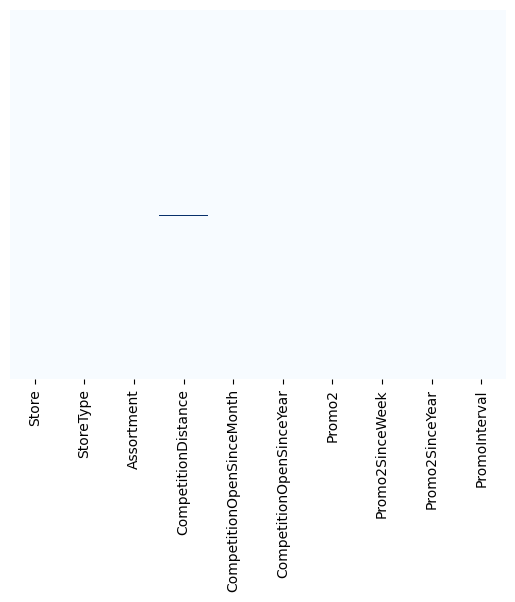

In [29]:
sns.heatmap(store_data_df.isnull(), yticklabels=False, cmap='Blues', cbar=False)

In [30]:
## Setting the missing values in Competition distance to mean of the column as filling the missing values with zero would indicate that the distance is 0 which won't be appropriate and also we have a lot of data so we can take the average.

store_data_df['CompetitionDistance'].fillna(store_data_df['CompetitionDistance'].mean(), inplace=True)

C:\Users\Palak\AppData\Local\Temp\ipykernel_13792\2401482241.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_data_df['CompetitionDistance'].fillna(store_data_df['CompetitionDistance'].mean(), inplace=True)


<Axes: >

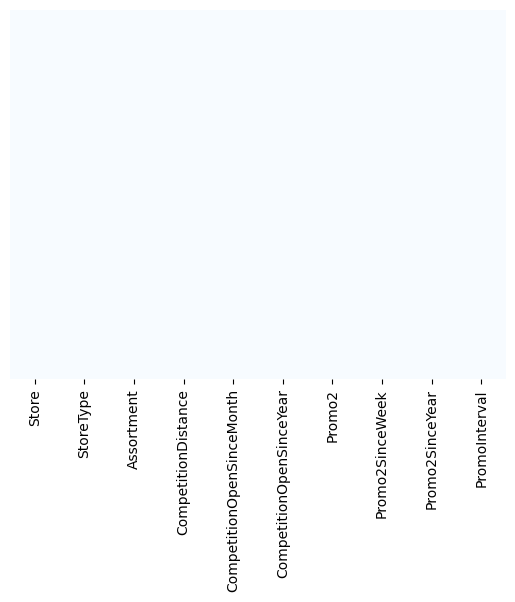

In [31]:
sns.heatmap(store_data_df.isnull(), yticklabels=False, cmap='Blues', cbar=False)

No missing values now.

In [32]:
store_data_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5404.901079,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,7652.849306,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2330.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

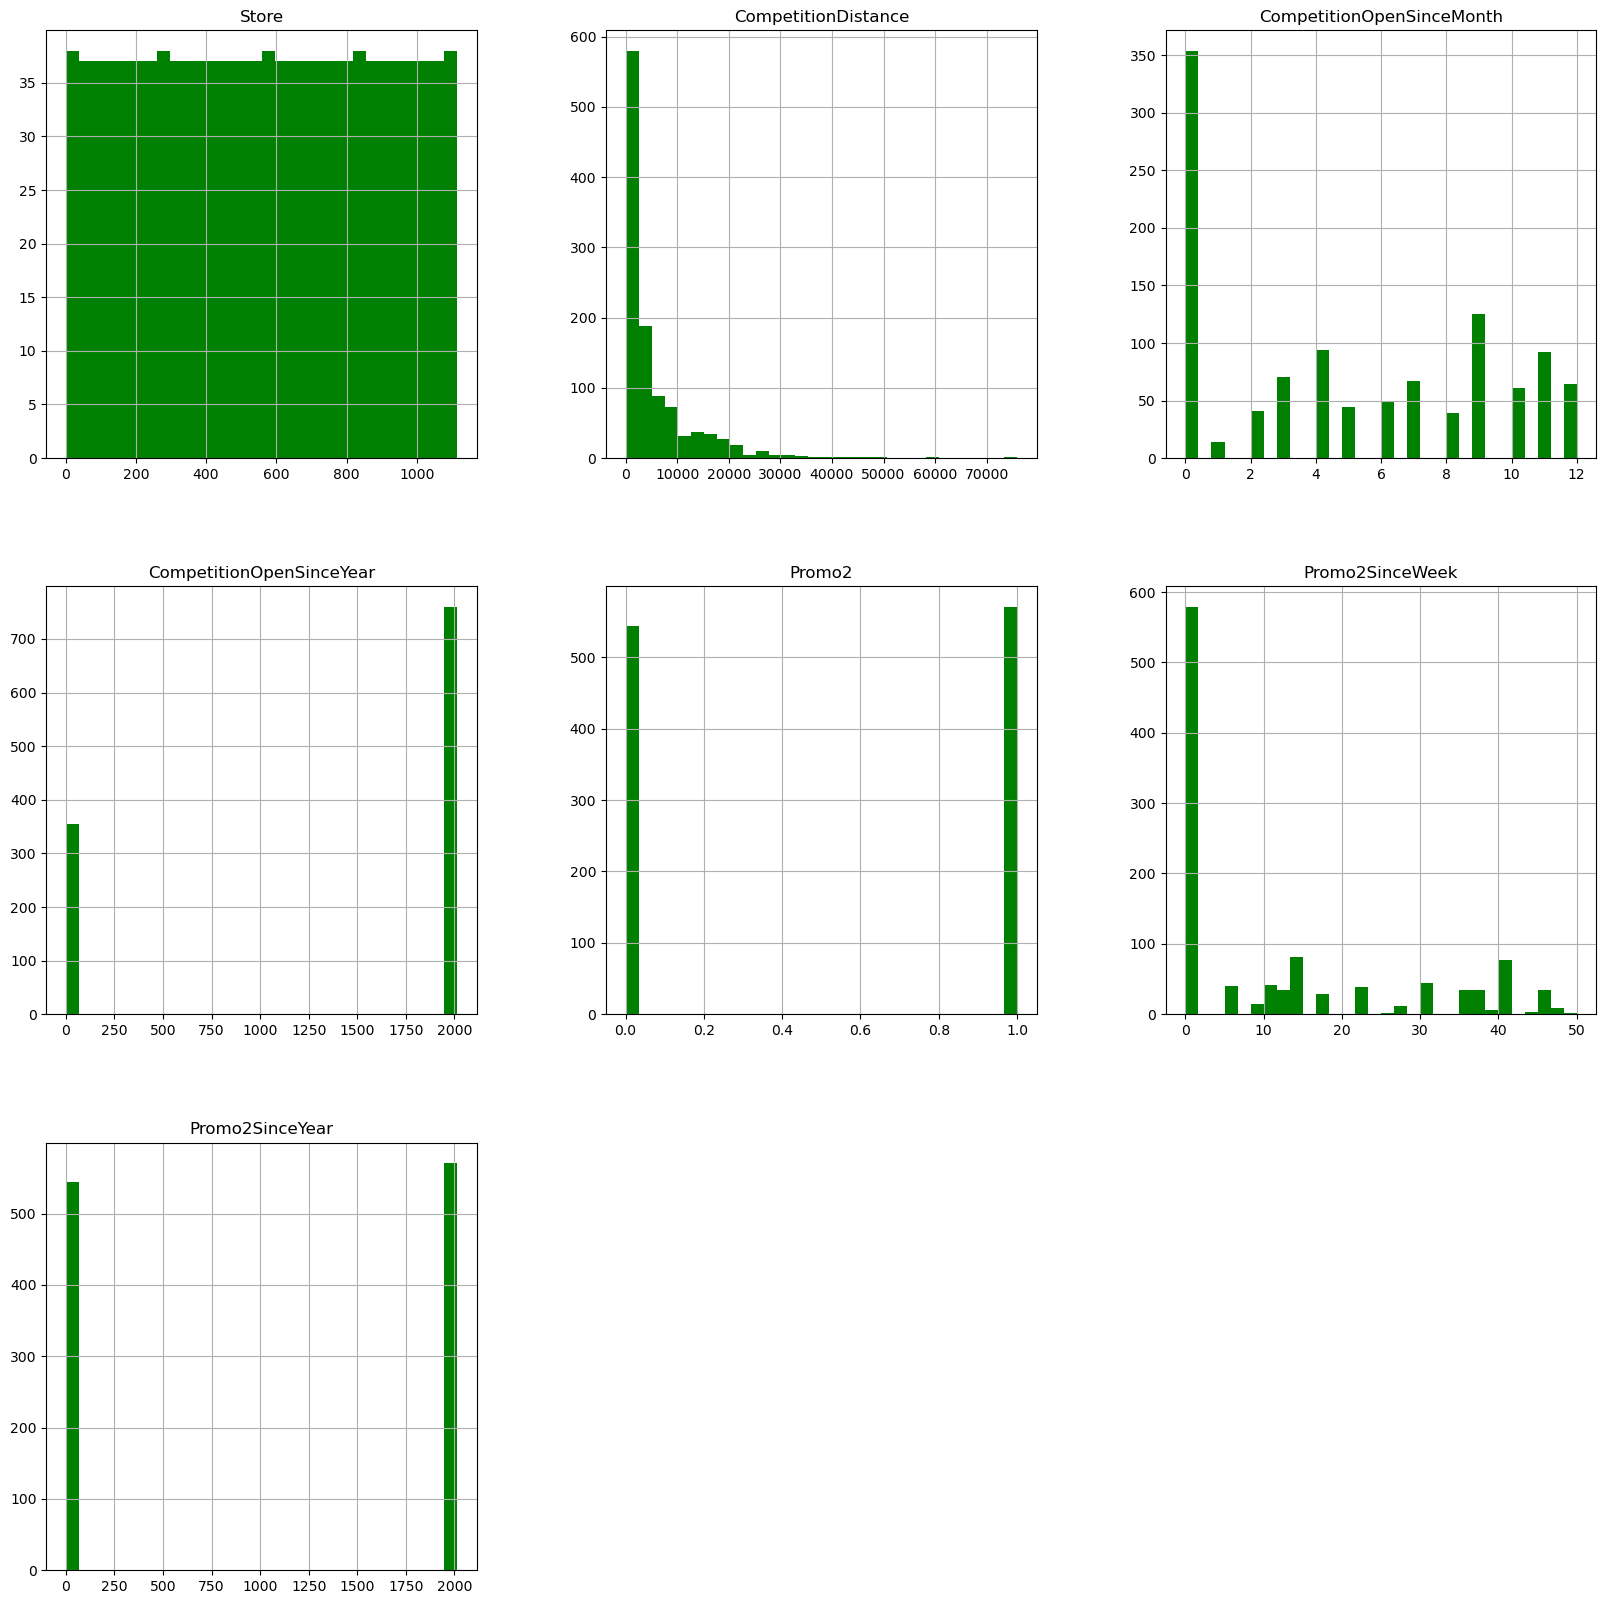

In [33]:
## PLotting the histogram for stores data

store_data_df.hist(bins = 30, figsize=(20,20), color = 'g')

## Observations

- The stores data is equally distributed, no bias.
- Most of the Competition stores are within a very short distance (0-3000m i.e : 3km).
-  Half of the stores work with Promo2.

## Task 5 : Merging Both Dataframes on 'Store' column

In [34]:
merged_sales_data = pd.merge(sales_data_df, store_data_df, how = 'inner', on='Store')

In [35]:
merged_sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [36]:
merged_sales_data.shape

(844392, 17)

In [37]:
numerical_df = merged_sales_data.select_dtypes(include=['int64', 'float64'])

In [38]:
## Correlations between data

correlations = numerical_df.corr()['Sales'].sort_values() ## correlations specific to target value 'Sales'.
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

Promo and Customers are Positively Correlated with Sales.

But, Promo2 seems not to be effective at all.

<Axes: >

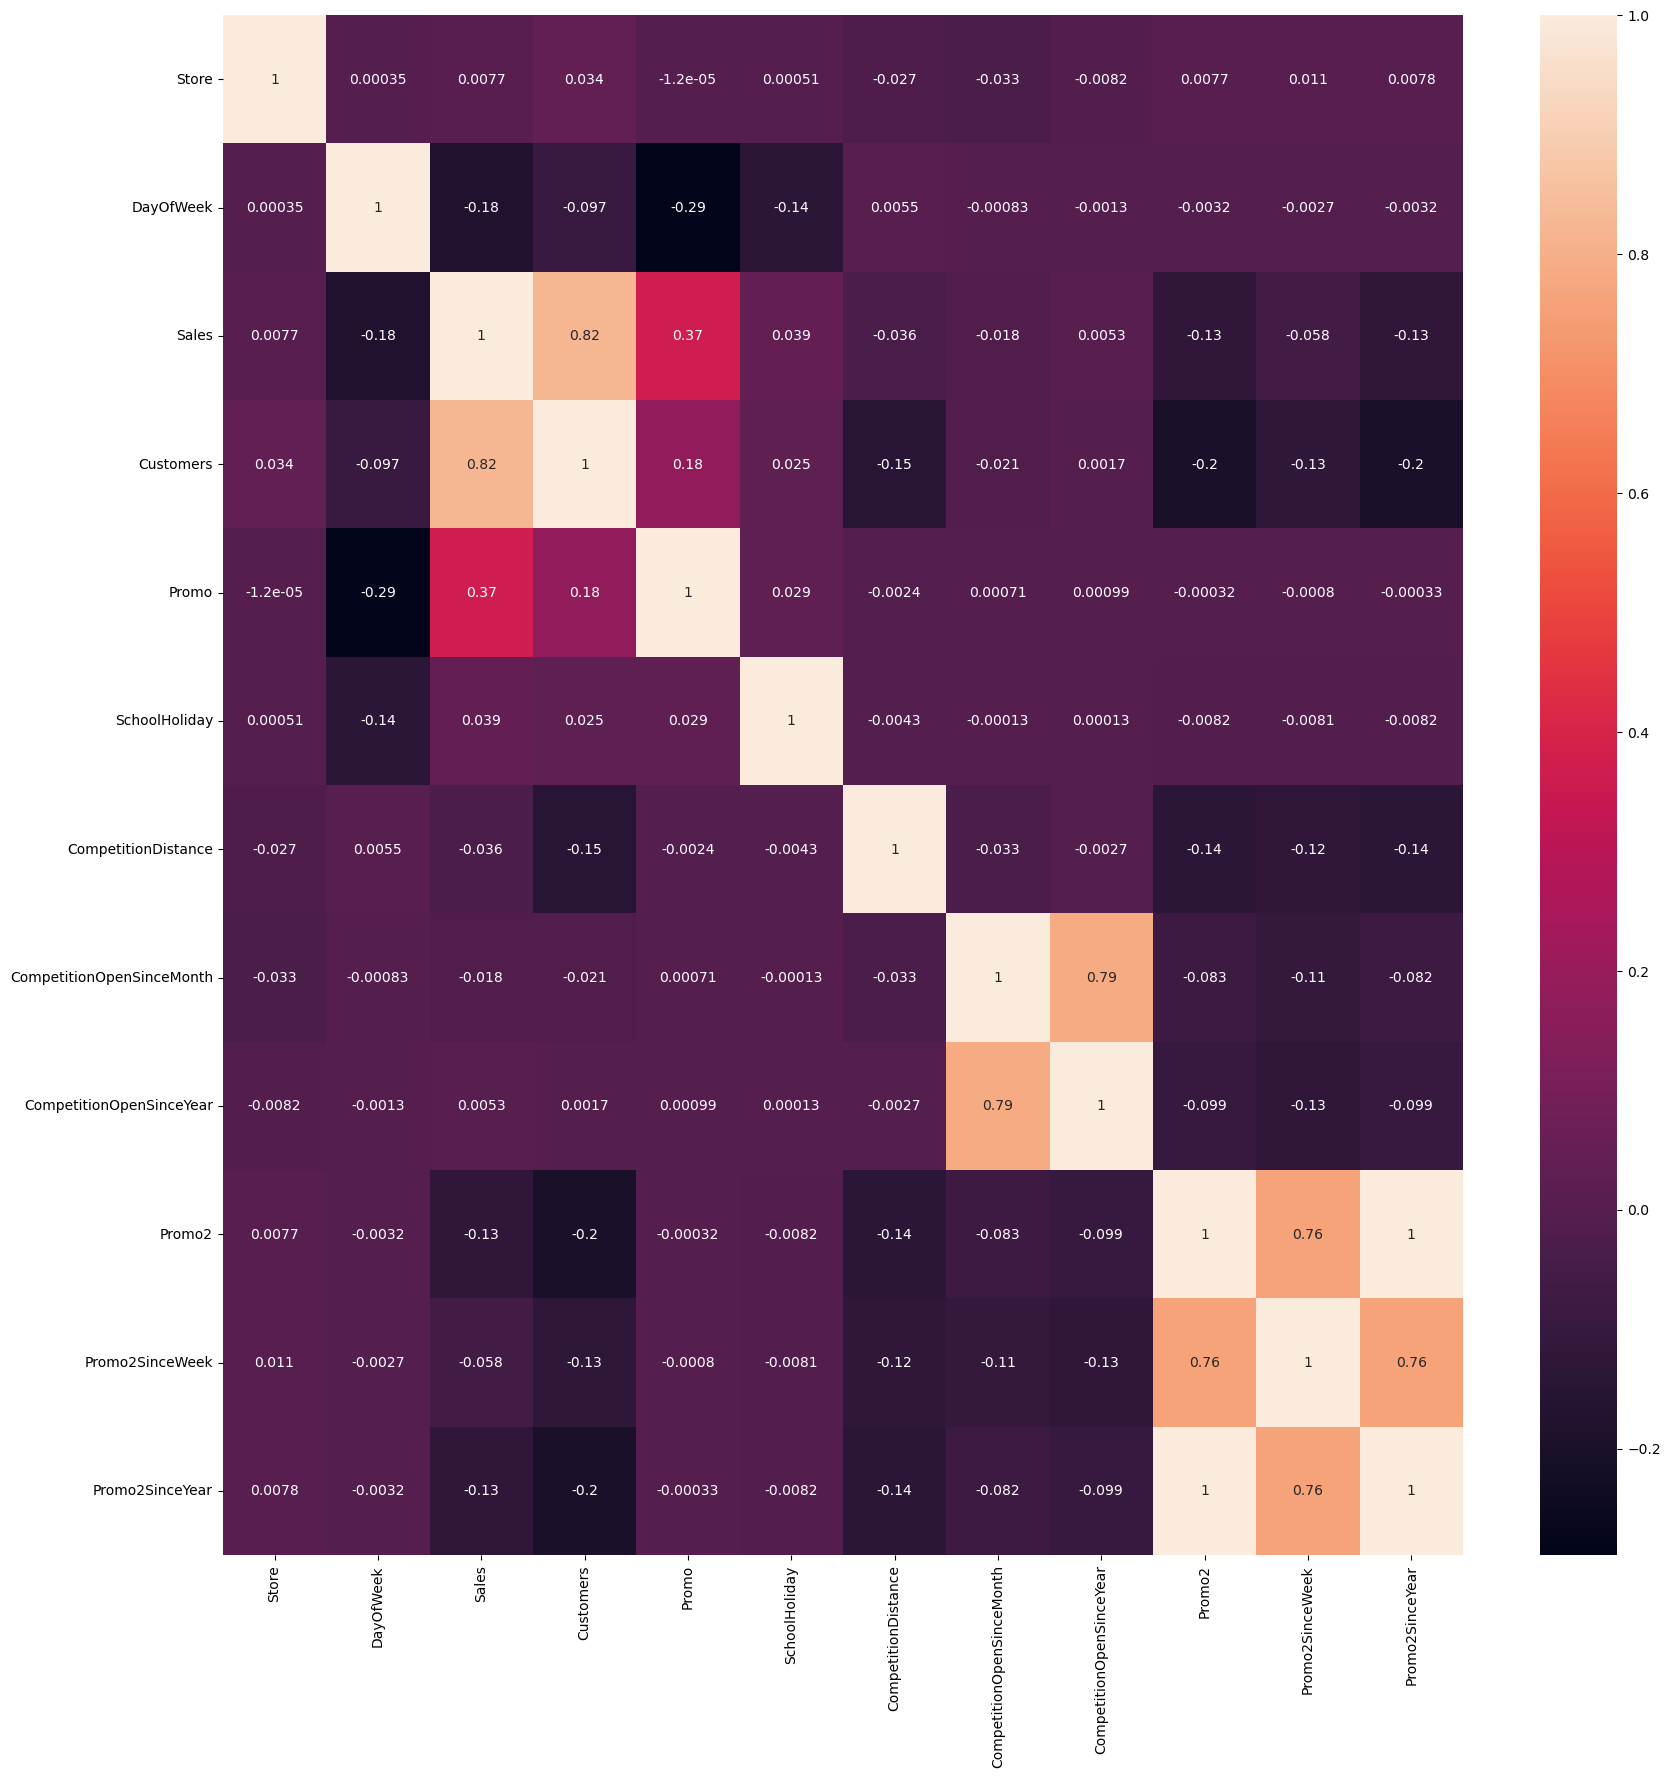

In [39]:
correlations = numerical_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot=True)

In [40]:
## Seperating the date into different columns : Date, month, year

merged_sales_data['Year'] = pd.DatetimeIndex(merged_sales_data['Date']).year

In [41]:
merged_sales_data['Month'] = pd.DatetimeIndex(merged_sales_data['Date']).month

In [42]:
merged_sales_data['Day'] = pd.DatetimeIndex(merged_sales_data['Date']).day

In [43]:
merged_sales_data

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,2013,1,1
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,2013,1,1
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,2013,1,1


## Task 6 : Data Visualization

Text(0.5, 1.0, 'Average number of Customers per month')

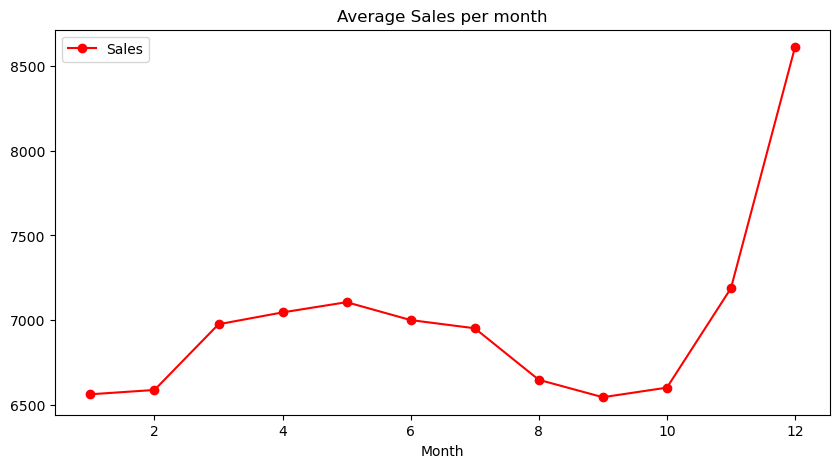

<Figure size 640x480 with 0 Axes>

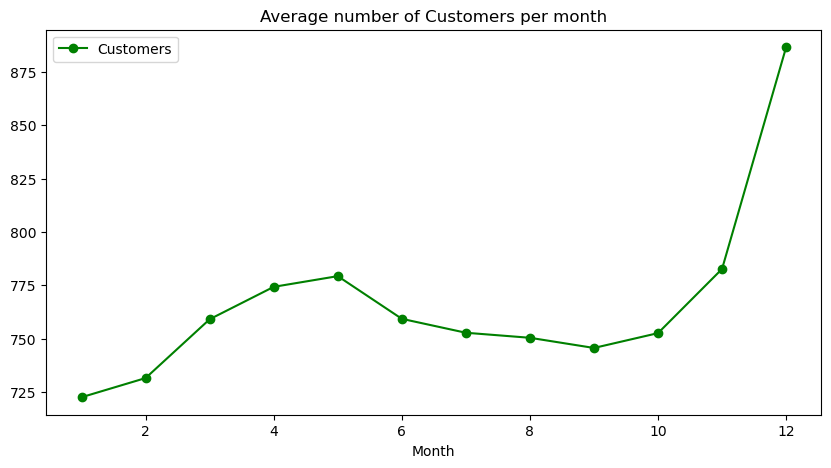

In [44]:
## Average Sales & Number of Customers per month.

axis = merged_sales_data.groupby('Month')[['Sales']].mean().plot(figsize=(10, 5), marker = 'o', color = 'r')
axis.set_title('Average Sales per month')

plt.figure()

axis = merged_sales_data.groupby('Month')[['Customers']].mean().plot(figsize=(10, 5), marker = 'o', color = 'g')
axis.set_title('Average number of Customers per month')

It seems that the sales and the number of Customers peak around Chrishmas Timeframe (November & December).

Text(0.5, 1.0, 'Average Sales per Day in a Month')

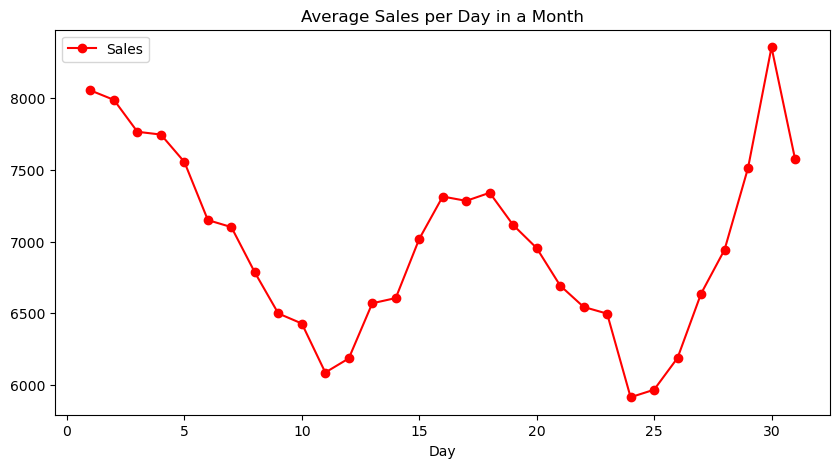

In [45]:
## Average Sales per Day of a Month.

axis = merged_sales_data.groupby('Day')[['Sales']].mean().plot(figsize=(10,5), color = 'r', marker = 'o')
axis.set_title('Average Sales per Day in a Month')

Most sales are around 30th and 1st of the Month.

Sales do go up in the middle of the Month.

Minimum customers are around 24 of the Month

Text(0.5, 1.0, 'Average Sales per Day of the Week')

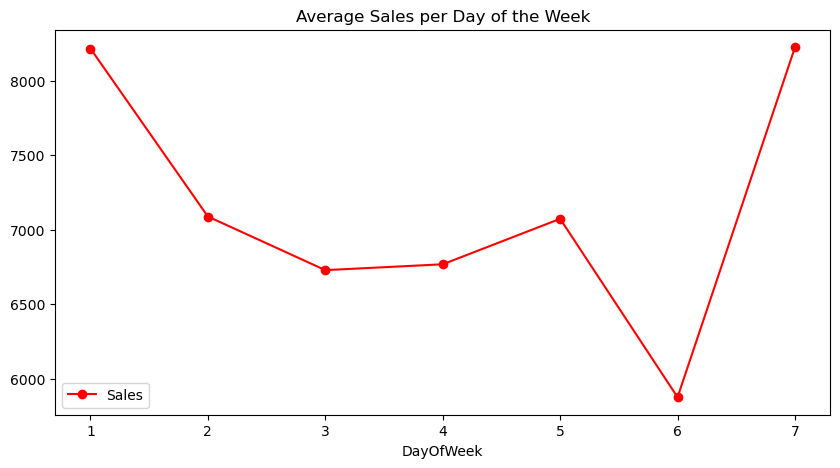

In [46]:
## Average Sales per Day of the Week.

axis = merged_sales_data.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5), color = 'r', marker = 'o')
axis.set_title('Average Sales per Day of the Week')

Maximum Sales are on 7th Day of the week (Sunday)

Minimum Sales are on 6th Day of the week (Sunday)

<Axes: xlabel='Date'>

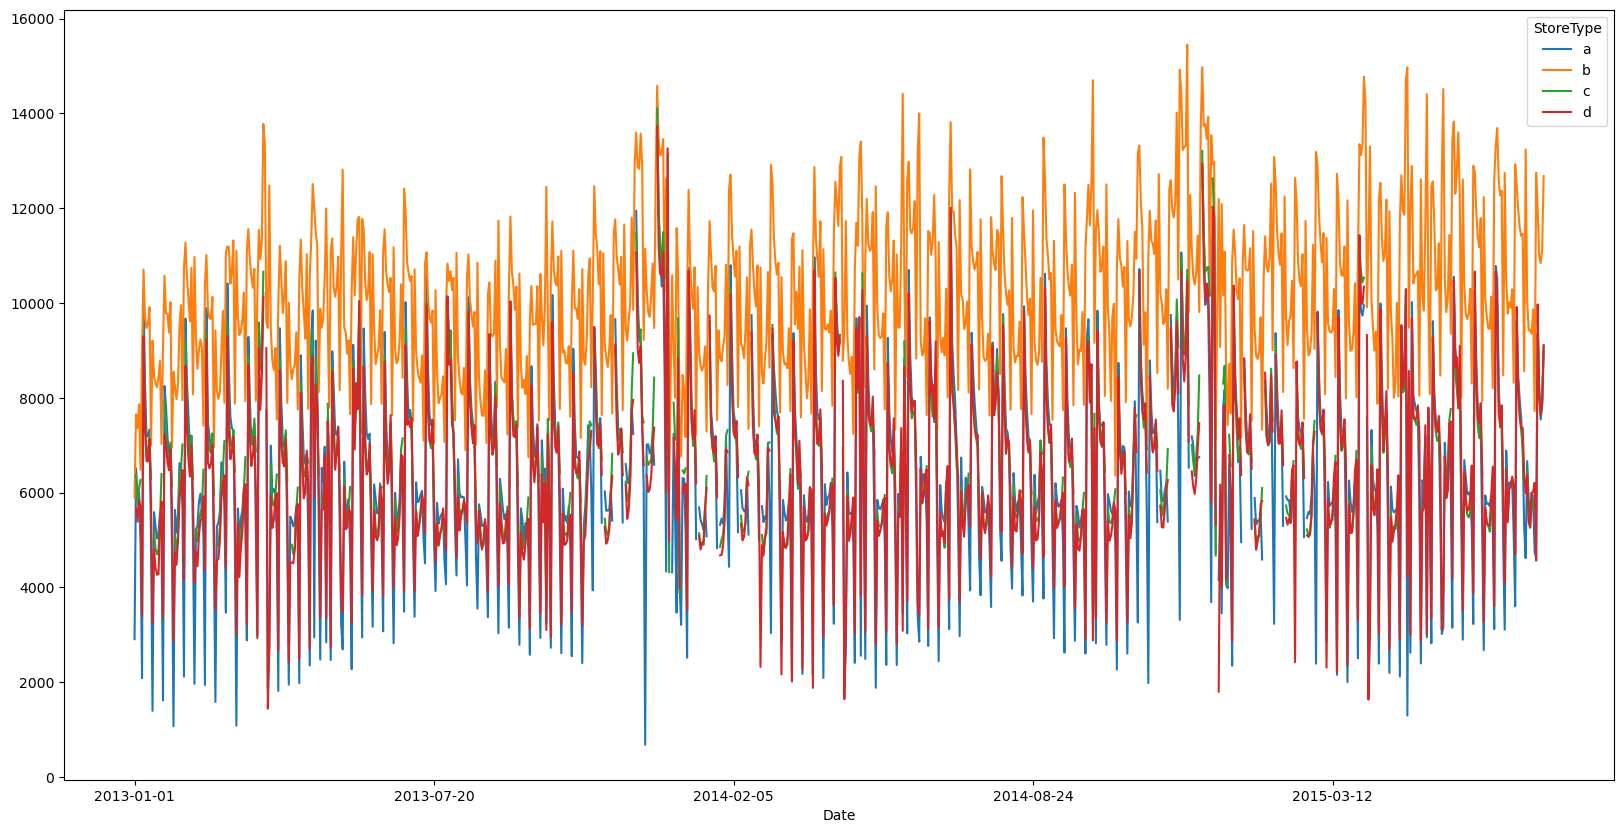

In [47]:
## Which store type has the highest amount of sales?

fig, ax = plt.subplots(figsize = (20, 10))
merged_sales_data.groupby(['Date', 'StoreType'])['Sales'].mean().unstack().plot(ax = ax)

StoreType 'b' has the highest value of the average sales.

<Axes: xlabel='Promo', ylabel='Customers'>

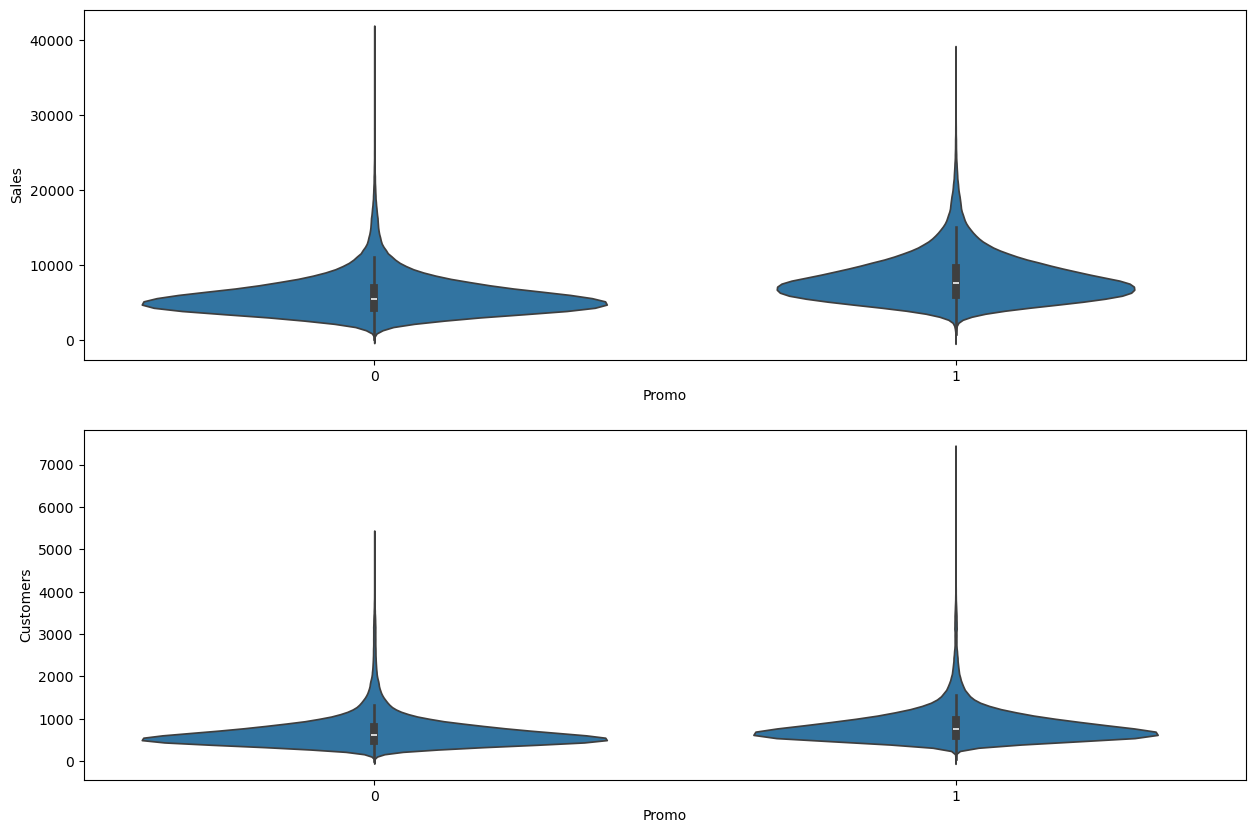

In [48]:
## The effect of Promo on Sales and Number of Customers

plt.figure(figsize=[15,10])

plt.subplot(211)
sns.violinplot(x = 'Promo', y= 'Sales', data=merged_sales_data)
plt.subplot(212)
sns.violinplot(x = 'Promo', y='Customers', data= merged_sales_data)

Average of sales and the number of Customers is high when a Promo is applied.

<Axes: xlabel='Promo', ylabel='Customers'>

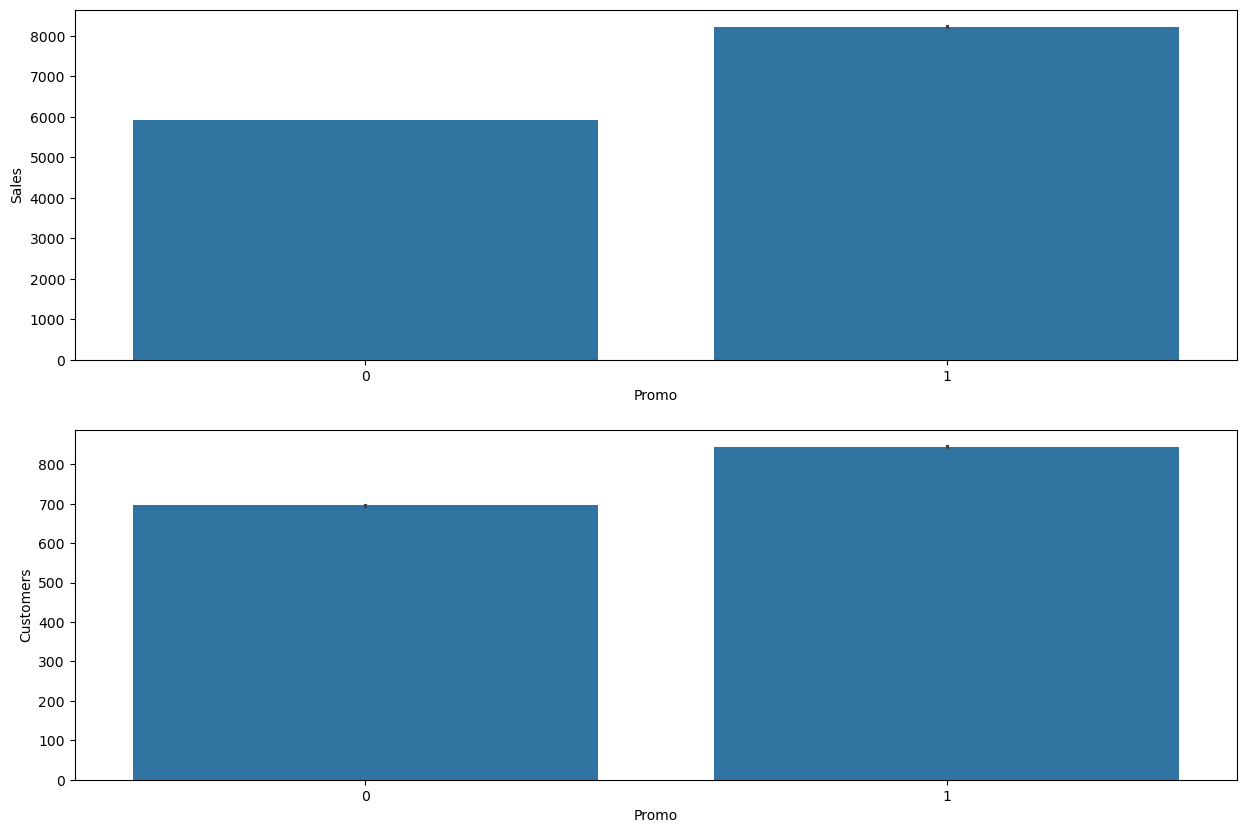

In [49]:
## The effect of Promo on Sales and Number of Customers

plt.figure(figsize=[15,10])

plt.subplot(211)
sns.barplot(x = 'Promo', y= 'Sales', data=merged_sales_data)
plt.subplot(212)
sns.barplot(x = 'Promo', y='Customers', data= merged_sales_data)

## Task 7 : Training and building the model using Facebook Prophet.

In [50]:
## Importing Facebook Prophet
from prophet import Prophet

In [51]:
## Applying Facebook Prophet
## To apply Facebook Prophet we need to rename the Date to (ds) colunm and sales colunm to (y) as we require Date on the X-axiz and predict sales on the Y axis.

## Function to make predictions for future sales.
def sales_predictions(Store_id, sales_data, periods) :
  sales_data = sales_data[sales_data['Store'] == Store_id] ## Extracting data related to a specific store.
  sales_data = sales_data[['Date', 'Sales']].rename(columns = {'Date' : 'ds', 'Sales' : 'y'}) ## Renaming colunms.
  sales_data = sales_data.sort_values('ds') ## Sorting values as per Date
  model = Prophet()
  model.fit(sales_data)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
  figure2 = model.plot_components(forecast)


21:19:33 - cmdstanpy - INFO - Chain [1] start processing
21:19:34 - cmdstanpy - INFO - Chain [1] done processing


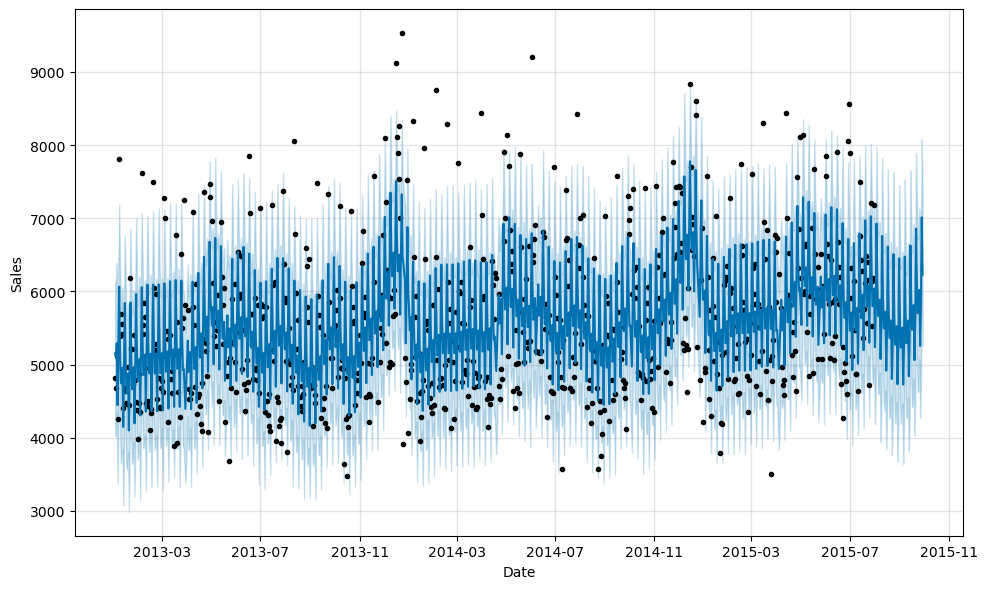

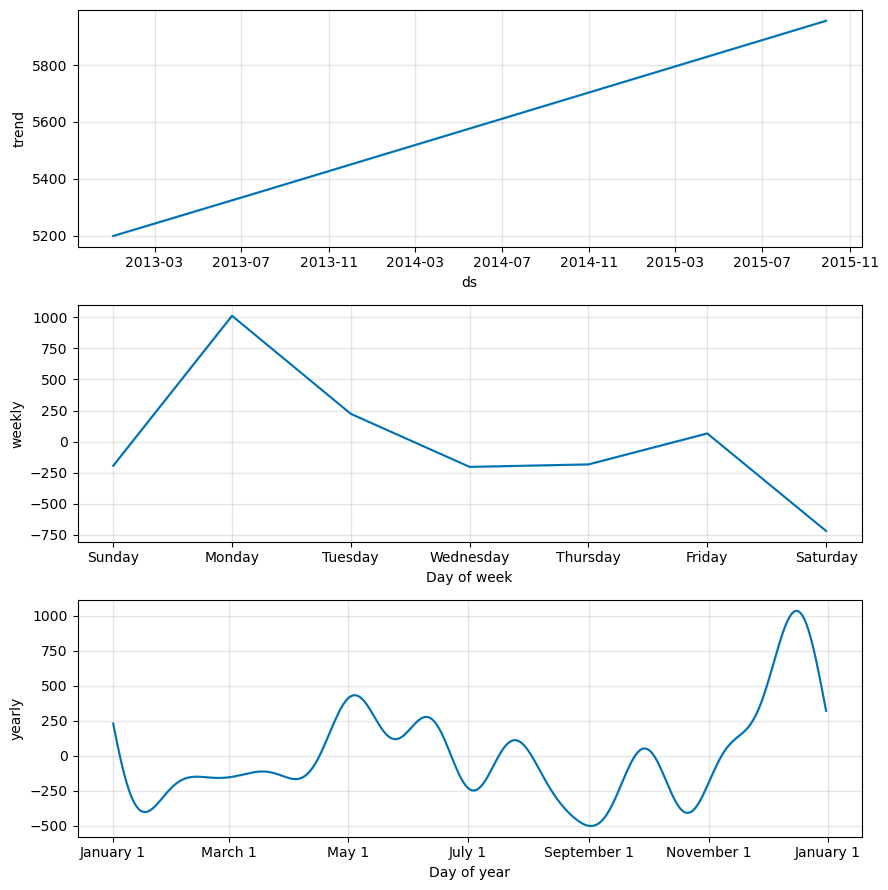

In [52]:
sales_predictions(10, merged_sales_data, 60) ## Predicting sales for store with store id : 10, and for 60 periods of time.

We got the Date and Sales for the store id : 10 for 60 periods of time(2 months : 60 days).

Observations for above predictions for Store 10 :

- Trends are going up.
- Around Monday most of the sales are expected to happen, and the sales are expected go down around Saturday.
- December & January is the time frame when most of the sales are expected to happen.

## Task 8 : Predicting the sales including the Holidays.

In [53]:
## Function to make predictions for future sales including on Holidays.
def sales_predictions_on_holidays(Store_id, sales_data, periods, holidays) :
  sales_data = sales_data[sales_data['Store'] == Store_id] ## Extracting data related to a specific store.
  sales_data = sales_data[['Date', 'Sales']].rename(columns = {'Date' : 'ds', 'Sales' : 'y'}) ## Renaming colunms.
  sales_data = sales_data.sort_values('ds') ## Sorting values as per Date
  model = Prophet(holidays = holidays) ## Adding the holidays associated with it.
  model.fit(sales_data)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
  figure2 = model.plot_components(forecast)


In [54]:
## Getting all the dates that are pertaining to School Holidays.

school_holidays = merged_sales_data[merged_sales_data['SchoolHoliday'] == 1].loc[:, 'Date'].values

In [55]:
school_holidays

array(['2015-07-31', '2015-07-31', '2015-07-31', ..., '2013-01-01',
       '2013-01-01', '2013-01-01'], dtype=object)

In [56]:
school_holidays.shape

(163457,)

In [57]:
## Getting all the dates that are pertaining to State Holidays.

state_holidays = merged_sales_data[(merged_sales_data['StateHoliday'] == 'a') | (merged_sales_data['StateHoliday'] == 'b') | (merged_sales_data['StateHoliday'] == 'c')].loc[:, 'Date'].values

In [58]:
state_holidays

array(['2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-

In [59]:
state_holidays.shape

(910,)

In [60]:
## Creating a dataframe fot State and School Holidays.

state_holidays = pd.DataFrame({'ds' : pd.to_datetime(state_holidays), 'holiday' : 'state_holiday'})

In [61]:
state_holidays

,ds,holiday
0,2015-06-04,state_holiday
1,2015-06-04,state_holiday
2,2015-06-04,state_holiday
3,2015-06-04,state_holiday
4,2015-06-04,state_holiday
...,...,...
905,2013-01-01,state_holiday
906,2013-01-01,state_holiday
907,2013-01-01,state_holiday
908,2013-01-01,state_holiday


In [62]:
school_holidays = pd.DataFrame({'ds' : pd.to_datetime(school_holidays), 'holiday' : 'school_holiday'})

In [63]:
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-31,school_holiday
2,2015-07-31,school_holiday
3,2015-07-31,school_holiday
4,2015-07-31,school_holiday
...,...,...
163452,2013-01-01,school_holiday
163453,2013-01-01,school_holiday
163454,2013-01-01,school_holiday
163455,2013-01-01,school_holiday


In [64]:
## Concatenating both Dataframes

holidays = pd.concat((state_holidays, school_holidays))

In [65]:
holidays

,ds,holiday
0,2015-06-04,state_holiday
1,2015-06-04,state_holiday
2,2015-06-04,state_holiday
3,2015-06-04,state_holiday
4,2015-06-04,state_holiday
...,...,...
163452,2013-01-01,school_holiday
163453,2013-01-01,school_holiday
163454,2013-01-01,school_holiday
163455,2013-01-01,school_holiday


21:20:51 - cmdstanpy - INFO - Chain [1] start processing
21:20:51 - cmdstanpy - INFO - Chain [1] done processing


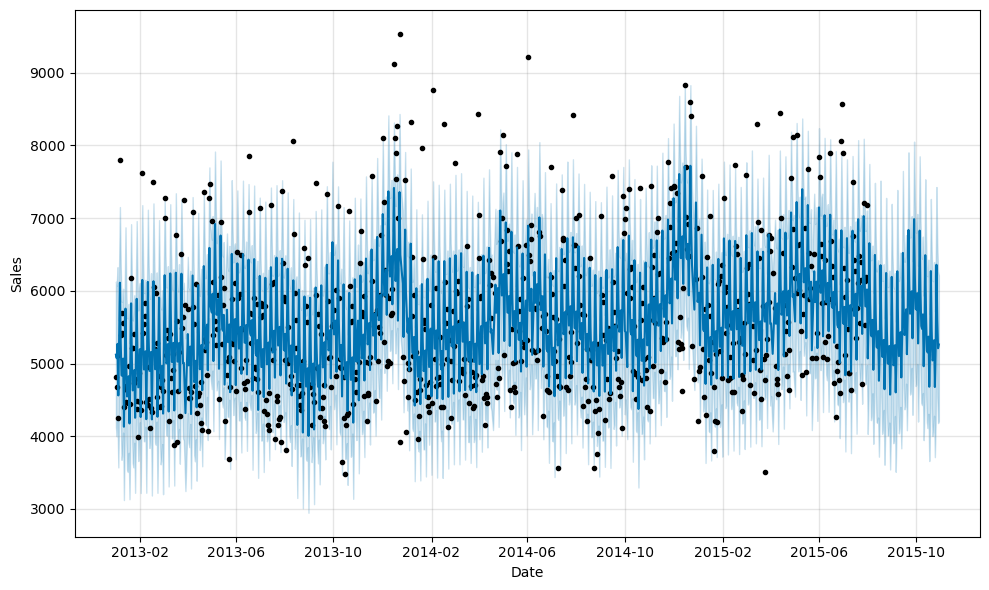

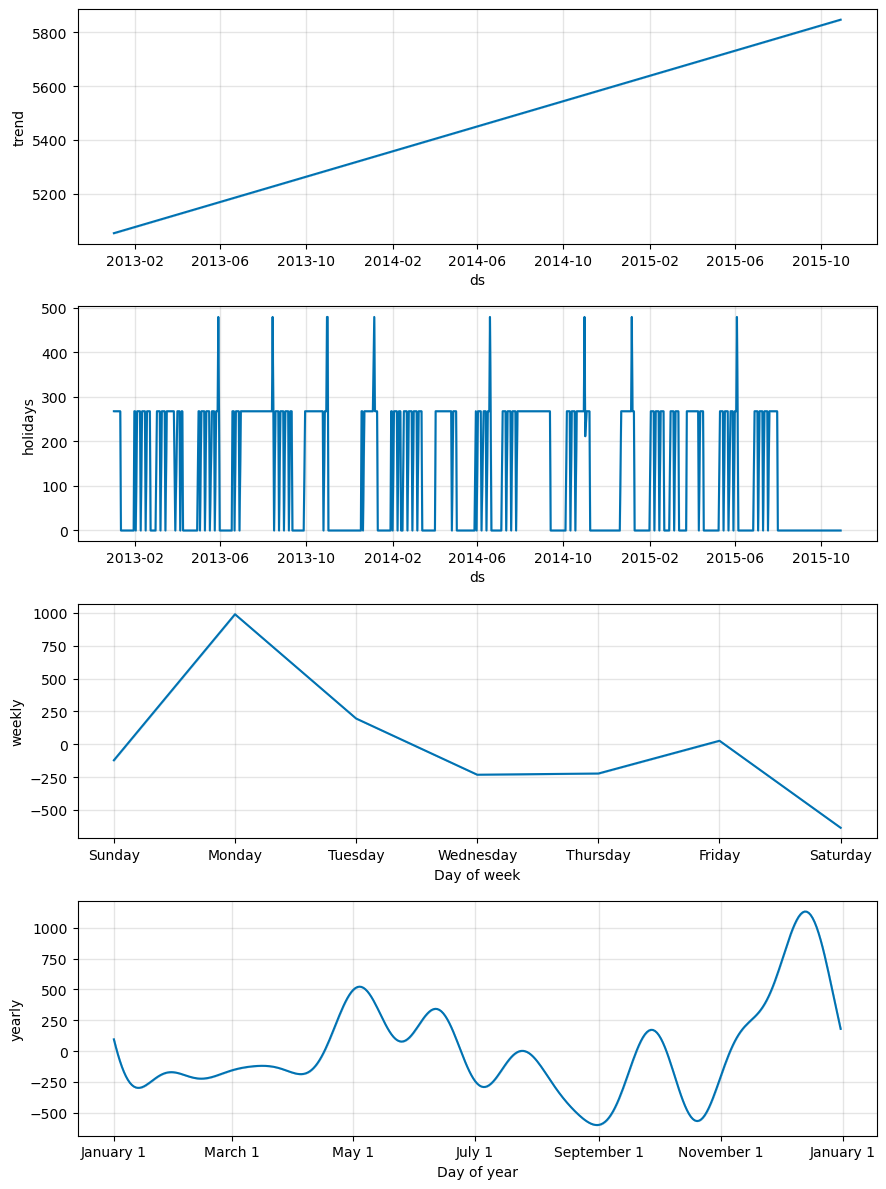

In [66]:
## Making Predictions based on Holidays

sales_predictions_on_holidays(10, merged_sales_data, 90, holidays)

Observations :

- Holidays : There are certain spikes related to Holidays.

## Final Observations : 

Most of the Datapoints fall close to the blue line and are within the shaded uncertainity range.

Hence, the model effectively captures the general upward & downward trends in sales over time, along with recurring seasonal patterns.